<a href="https://colab.research.google.com/github/stazam/DTSE-project/blob/main/DTSE_steam_data_reviews_explanatory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Quick Explanatory analysis**
<hr>

In [1]:
import tensorflow as tf
import keras
import sys
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing data files and help_function module

In [2]:
sys.path.append('/content/drive/MyDrive/DTSE-data/Python-files')
from help_functions import *

df_overview = pd.read_csv('/content/drive/MyDrive/DTSE-data/data-files/game_overview.csv')
df_train = pd.read_csv('/content/drive/MyDrive/DTSE-data/data-files/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/DTSE-data/data-files/test.csv')

So we can see, we have three data types. 


*   Train and test set 
*   Game overview - contains useful information, which we will merge to train/test set

We will start by exploring train data.



# **Train.csv**

In [7]:
df_train.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [8]:
df_train.shape

(17494, 5)

In [4]:
df_train.dtypes

review_id            int64
title               object
year               float64
user_review         object
user_suggestion      int64
dtype: object

In [10]:
for i, val in enumerate(df_train.isnull()):
  if val:
    print("The number of missing values in variable \"{}\" is: {}".format(df_train.columns[i],df_train.isnull().sum()[i]))

The number of missing values in variable "review_id" is: 0
The number of missing values in variable "title" is: 0
The number of missing values in variable "year" is: 178
The number of missing values in variable "user_review" is: 0
The number of missing values in variable "user_suggestion" is: 0


From the **previous cells**, we see following things:

1.   The size of dataFrame is 17494 records and 5 columns.
2.   Train set contains 5 variables: 3 numerical and two categorical. 
3.   We have only 178 missing variables ouf of all values. We will later describe what type of inputing technique we use.

# **Categorical variables**

We have two categorical varibales **title** and also **user_review**. Later on we will give a special attention to user_review, since it is a long string variable which potentianally carrie a lots of information.



In [11]:
print("Number of unique categories of \"title\" variable is {}".format(len(df_train.title.unique())))

Number of unique categories of "title" variable is 44


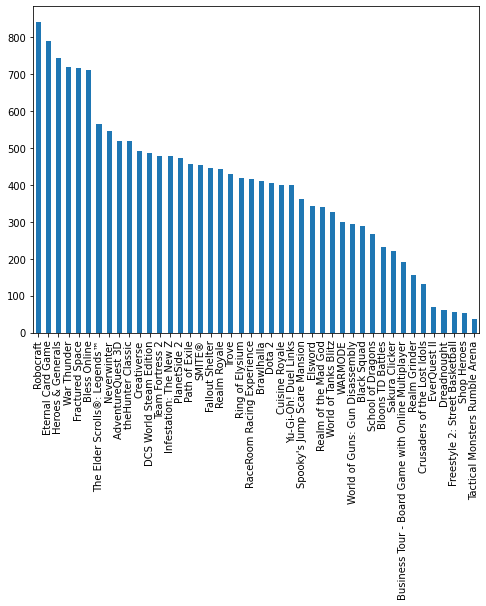

In [13]:
plt.figure(figsize=(8, 6))
df_train.title.value_counts().plot(kind='bar')
plt.show()

#df_train.title.value_counts() #if we would wanted to look at precise counts.

We see that we have **44** unique categories for variable **title**.
Some of them with many observations and also categories with fewer ones. In models with less parametrs it is common technique to concatenate categories with few observations into on common "Other". But in case of Neural networks, which we will use for text variables, it is not necessary, since NN can easily deal with it. 


# **Test.csv**

In [25]:
df_test.head()

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B..."
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...
2,1605,Counter-Strike: Global Offensive,2018.0,Edit 11/12/18I have tried playing CS:GO recent...
3,1606,Counter-Strike: Global Offensive,2015.0,The game is great. But the community is the wo...
4,1607,Counter-Strike: Global Offensive,2015.0,I thank TrulyRazor for buying this for me a lo...


In [26]:
df_test.shape

(8045, 4)

In [27]:
df_test.dtypes

review_id        int64
title           object
year           float64
user_review     object
dtype: object

In [28]:
for i, val in enumerate(df_test.isnull()):
  if val:
    print("The number of missing values in variable \"{}\" is: {}".format(df_test.columns[i],df_test.isnull().sum()[i]))

The number of missing values in variable "review_id" is: 0
The number of missing values in variable "title" is: 0
The number of missing values in variable "year" is: 67
The number of missing values in variable "user_review" is: 0


In [33]:
df_train['title'].values

NameError: ignored

Next we will look at **game_overview.csv** file.

# **game_overview.csv**

In [14]:
df_overview.head()

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...
2,WARMODE,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...
3,Fractured Space,Edge Case Games Ltd.,Edge Case Games Ltd.,"['Space', 'Multiplayer', 'Free to Play', 'PvP'...",Take the helm of a gigantic capital ship and g...
4,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...


In [16]:
df_overview.shape

(64, 5)

In [15]:
df_overview.dtypes

title        object
developer    object
publisher    object
tags         object
overview     object
dtype: object

In [18]:
for i, val in enumerate(df_overview):
  if val:
    print("The number of missing values in variable \"{}\" is {}".format(df_overview.columns[i],df_overview.isnull().sum()[i]))

The number of missing values in variable "title" is 0
The number of missing values in variable "developer" is 0
The number of missing values in variable "publisher" is 0
The number of missing values in variable "tags" is 0
The number of missing values in variable "overview" is 0


In [19]:
for col in df_overview.columns:
    print( "The column %s has: %d categories" %(col,len(df_overview[col].unique())))

The column title has: 64 categories
The column developer has: 59 categories
The column publisher has: 54 categories
The column tags has: 64 categories
The column overview has: 62 categories


To summarize information about **game_review file**:

1. Dataset contains 64 observations and 5 variables. The inportant thing is, that it contains variables which are not included in train/test set and possibly can hold valuable information for classification. So we will later merge this files.
2. All variables are categorical.
3. We have no missing data.
4. Variables consists of many categories. 


Now, we will again look at train set, especially at variable **user_suggestions**, which is our target variable and something we want to predict. So based on this variable, we can check if the dataset is **ballanced** or **unballanced**. 

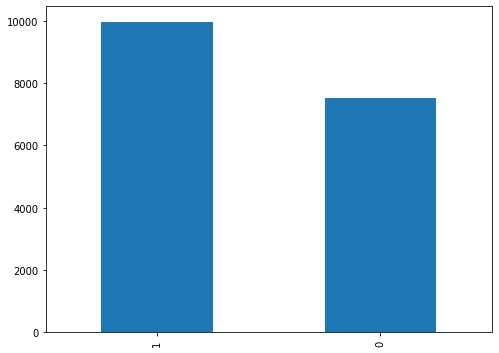

1    9968
0    7526
Name: user_suggestion, dtype: int64


In [22]:
plt.figure(figsize=(8, 6))
df_train.user_suggestion.value_counts().plot(kind='bar')
plt.show()

print(df_train.user_suggestion.value_counts())

We can clearly see, that dataset in moreless **balanced**: 1 cat. - 9968, 0 cat. - 7526, so it will not need a special treatment. In case of unbalanceness we would need to use some of technique: *undersampling, oversampling* or to use some *generators* to equal observation from classes.